In [11]:
#установка необходимых библиотек
import pandas as pd
import openpyxl #открыть .xlsx файл
import numpy as np
import seaborn as sns #визуализация
import matplotlib.pyplot as plt #визуализация

In [12]:
#Чтение файлов с компьютера, объединение в единый data frame    

def read_df_full():
    quantity = int(input("Введите количество файлов:"))
    df_fulls = []
    
    for n in range(quantity):
        name = input("Введите имя файла и путь к нему")
        df_full = pd.read_excel(name, skiprows = 19)
        df_full = df_full.dropna(axis=1, how='all') #убрать пустые столбцы
        df_fulls.append(df_full) #объединить данные из разных файлов в один data frame
    
    df_full = df_fulls[0]
    for df in df_fulls[1:]: #объединить данные из разных файлов в единый стобец
        df_full = pd.concat(df_fulls, ignore_index=True)
        

    return(df_full)


In [13]:
df_full = read_df_full()
hk_gene = input("Введите название гена домашнего хозяйства")
print(df_full.head(10))

Введите количество файлов: 3
Введите имя файла и путь к нему C:\Users\Поля\Desktop\графики Prisma и обработка данных\2025-04-25 MDA468 CMA ctrl, 16h, 250, 1500, 3000 ugml GAPDH good.xlsx
Введите имя файла и путь к нему C:\Users\Поля\Desktop\графики Prisma и обработка данных\2025-04-28 MDA468 CMA ctrl, 16h, 250, 1500, 3000 ugml STING, TBK1, IRF3, IRF7, IFN1a, IFN1b.xlsx
Введите имя файла и путь к нему C:\Users\Поля\Desktop\графики Prisma и обработка данных\2025-05-07 MDA468 CMA ctrl, 16h, 250, 1500, 3000 ugml IL1, IL6, Noxa, Bcl2, Bak, Bax, Bad.xlsx
Введите название гена домашнего хозяйства GAPDH


  Well Target          Sample         Cq
0  A06  GAPDH            ctrl  18.120947
1  A07  GAPDH            ctrl  18.241323
2  B06  GAPDH   16h 250 ug/ml  18.310364
3  B07  GAPDH   16h 250 ug/ml  18.307568
4  C06  GAPDH  16h 1500 ug/ml  18.672567
5  C07  GAPDH  16h 1500 ug/ml  18.462968
6  D06  GAPDH  16h 3000 ug/ml  18.606318
7  D07  GAPDH  16h 3000 ug/ml  18.662335
8  E06  GAPDH            ctrl  18.491946
9  F06  GAPDH   16h 250 ug/ml  18.424835


In [14]:
#нормализация названий в Sample

def normalize_sample(sample):
    sample = sample.str.lower().str.strip() #в нижний регистр + убрать пробелы с краёв
    
    sample = sample.str.replace(r'16h', '16 h', regex=True) #заменяем "16h" на "16 h"
    
    sample = sample.str.replace(r'^ctrl', 'control', regex=True) #заменяем 'ctrl' на 'control' и "k" на "control"
    sample = sample.str.replace(r'^k', 'control', regex=True)

    sample = sample.str.replace(r'\s+', ' ', regex=True) #убираем множественные пробелы
    
    return sample

#нормализация названий в Target - убираем пробелы и приводим к верхнему регистру 
df_full['Target'] = df_full['Target'].str.strip().str.upper()

#нормализация для hk_gene - убираем пробелы и приводим к верхнему регистру 
hk_gene = hk_gene.strip().upper()

In [15]:
df_full['Sample'] = normalize_sample(df_full['Sample'])

In [16]:
#преобразование типов данных
df_full['Well'] = df_full['Well'].astype("string")
df_full['Target'] = df_full['Target'].astype("string")
df_full['Sample'] = df_full['Sample'].astype("string")
df_full['Cq'] = df_full['Cq'].astype(float)

#print(row.dtypes)

In [17]:
#создаём отдельный data frame для каждого гена
genes = df_full['Target'].unique()
gene_row = {gene: df_full[df_full['Target'] == gene].copy() for gene in genes} #создаём словарь, где ключ — имя гена, значение — DataFrame только с этим геном

#сортировка по Sample
for gene in gene_row:
    gene_row[gene] = gene_row[gene].sort_values(by='Sample')

#print(gene_row)

In [18]:
#проверяем количество технических повторов
good_quality_PCR = True  # флаг, который станет False, если найдутся проблемы

for gene, df in gene_row.items():
    for sample_name, group in df.groupby('Sample'):
        if len(group) != 3:
            good_quality_PCR = False
            print(f"Ген: {gene}, Sample: {sample_name} - {len(group)} повтора.")

if good_quality_PCR:
    print("Для всех точек есть 3 повтора.")


Ген: TBK1, Sample: 16 h 3000 ug/ml - 2 повтора.
Ген: TBK1, Sample: control - 2 повтора.
Ген: IFN1A, Sample: 16 h 250 ug/ml - 2 повтора.
Ген: IFN1A, Sample: 16 h 3000 ug/ml - 2 повтора.
Ген: IRF7, Sample: 16 h 1500 ug/ml - 2 повтора.
Ген: IRF7, Sample: control - 2 повтора.
Ген: IFN1B, Sample: control - 2 повтора.
Ген: IL1, Sample: 16 h 1500 ug/ml - 2 повтора.
Ген: IL1, Sample: 16 h 250 ug/ml - 2 повтора.
Ген: IL1, Sample: control - 2 повтора.
Ген: BAK, Sample: 16 h 1500 ug/ml - 2 повтора.
Ген: BAK, Sample: 16 h 3000 ug/ml - 2 повтора.
Ген: BAD, Sample: 16 h 1500 ug/ml - 2 повтора.
Ген: BAD, Sample: control - 2 повтора.
Ген: IL6, Sample: 16 h 1500 ug/ml - 2 повтора.
Ген: IL6, Sample: 16 h 250 ug/ml - 2 повтора.
Ген: IL6, Sample: 16 h 3000 ug/ml - 2 повтора.
Ген: IL6, Sample: control - 2 повтора.
Ген: NOXA, Sample: 16 h 1500 ug/ml - 2 повтора.


In [19]:
#выводим выбросы
print("Разница больше 0.6 между следующими значениями:")

for gene, df in gene_row.items():

    for sample_name, group in df.groupby('Sample'):
        values = group['Cq'].tolist() #преобразуем грппы в списки

        if len(values) != 3:
            continue

        large_diffs = [
            (i, j)
            for i in range(3)
            for j in range(i + 1, 3)
            if abs(values[i] - values[j]) > 0.6
        ]

        if large_diffs:
            print(f"\n Gene: {gene}, Sample: {sample_name}")
            for i, j in large_diffs:
                print(f"    {values[i]} и {values[j]} (разница {abs(values[i] - values[j]):.2f})")

Разница больше 0.6 между следующими значениями:

 Gene: BAK, Sample: control
    34.3824866750211 и 33.613154701999 (разница 0.77)

 Gene: BAX, Sample: 16 h 3000 ug/ml
    27.0275611013914 и 27.7223003906252 (разница 0.69)
    27.7223003906252 и 27.0378863467534 (разница 0.68)


In [20]:
#удаляем выбросы

clean_gene_row = {}

for gene, df in gene_row.items():
    row_clean = df_full.copy() 
    to_remove_all = set()  # Индексы, которые нужно удалить по этому гену

    for sample_name, group in df.groupby('Sample'):
        values = group['Cq'].tolist()
        indices = group.index.tolist()

        if len(values) != 3:
            continue

        #Находим пары с большой разницей
        large_diffs = [
            (i, j)
            for i in range(3)
            for j in range(i + 1, 3)
            if abs(values[i] - values[j]) > 0.6
        ]

        if large_diffs:
            to_remove_idx = set() #cет, где будут индексы элементов, которые мы удаляем

            for i, j in large_diffs:
                k = 3 - i - j  # индекс третьего значения
                dist_i = abs(values[i] - values[k])
                dist_j = abs(values[j] - values[k])

                outlier = i if dist_i > dist_j else j
                to_remove_idx.add(outlier)

                print("\nУдаленные данные:")
                print(f" Gene: {gene}, Sample: {sample_name}, Пара: {values[i]} и {values[j]}, удаляем выброс: {values[outlier]}")

            #Преобразуем локальные индексы в реальные индексы DataFrame
            drop_indices = [indices[idx] for idx in to_remove_idx]
            to_remove_all.update(drop_indices)

    #Удаляем выбросы сразу после обработки всех групп
    row_clean.drop(to_remove_all, inplace=True)
    clean_gene_row[gene] = row_clean  # сохраняем очищенный DataFrame в новый словарь
    


Удаленные данные:
 Gene: BAK, Sample: control, Пара: 34.3824866750211 и 33.613154701999, удаляем выброс: 34.3824866750211

Удаленные данные:
 Gene: BAX, Sample: 16 h 3000 ug/ml, Пара: 27.0275611013914 и 27.7223003906252, удаляем выброс: 27.7223003906252

Удаленные данные:
 Gene: BAX, Sample: 16 h 3000 ug/ml, Пара: 27.7223003906252 и 27.0378863467534, удаляем выброс: 27.7223003906252


In [21]:
#Собираем очищенные данные в один data frame, даём новые индексы
row_cleaned = pd.concat(clean_gene_row.values(), ignore_index=True)

#создаём df для hk_gene и целевых генов:
hk_df = row_cleaned[row_cleaned['Target'] == hk_gene].copy()
target_df = row_cleaned[row_cleaned['Target'] != hk_gene].copy()

#Считаем среднее Cq hk_gene и присоединяем к data frame
hk_means = hk_df.groupby('Sample')['Cq'].mean().reset_index()
hk_means = hk_means.rename(columns={'Cq': 'Cq_hk_mean'})
merged = pd.merge(target_df, hk_means, on='Sample', how='left')

#Считаем ΔCq
merged['ΔCq'] = merged['Cq'] - merged['Cq_hk_mean']

control_df = merged[merged['Sample'] == 'control']
control_means = control_df.groupby('Target')[['ΔCq']].mean().reset_index()
control_means = control_means.rename(columns={'ΔCq': 'ΔCq_control'})
merged = merged.merge(control_means, on='Target', how='left')

#Вычисляем ΔΔCq и fold change
merged['ΔΔCq'] = merged['ΔCq'] - merged['ΔCq_control']
merged['fold_change'] = 2 ** (merged['ΔΔCq'] * (-1))

print(merged)
merged.to_excel("output.xlsx", index=False)

#desired_order = ['control', '16 h 250 ug/ml', '16 h 1500 ug/ml', '16 h 3000 ug/ml']
#merged['Sample'] = pd.Categorical(merged['Sample'], categories=desired_order, ordered=True)

     Well Target           Sample         Cq  Cq_hk_mean        ΔCq  \
0     A01  STING          control  27.006731   18.284739   8.721992   
1     A02  STING          control  27.357416   18.284739   9.072677   
2     A03  STING          control  26.833233   18.284739   8.548494   
3     A05   TBK1          control  29.491640   18.284739  11.206902   
4     A06   TBK1          control  29.203654   18.284739  10.918915   
...   ...    ...              ...        ...         ...        ...   
1911  H05    BAX  16 h 3000 ug/ml  27.722300   18.650385   9.071916   
1912  H06    BAX  16 h 3000 ug/ml  27.037886   18.650385   8.387502   
1913  H07   NOXA  16 h 3000 ug/ml  23.150683   18.650385   4.500298   
1914  H08   NOXA  16 h 3000 ug/ml  23.248321   18.650385   4.597937   
1915  H09   NOXA  16 h 3000 ug/ml  23.237755   18.650385   4.587370   

      ΔCq_control      ΔΔCq  fold_change  
0        8.781055 -0.059063     1.041789  
1        8.781055  0.291623     0.816983  
2        8.781055 

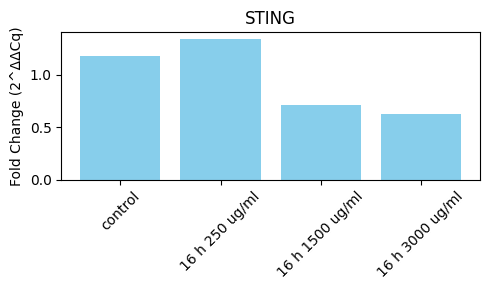

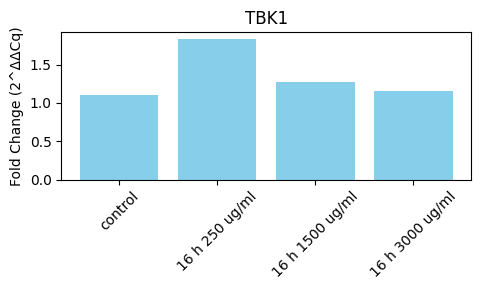

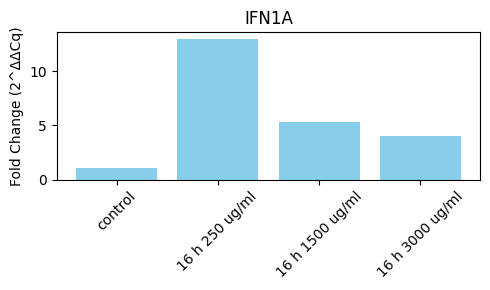

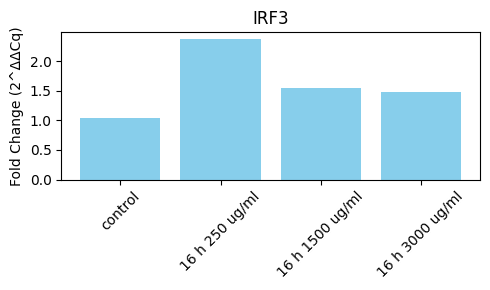

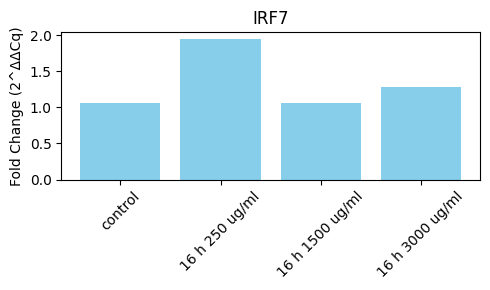

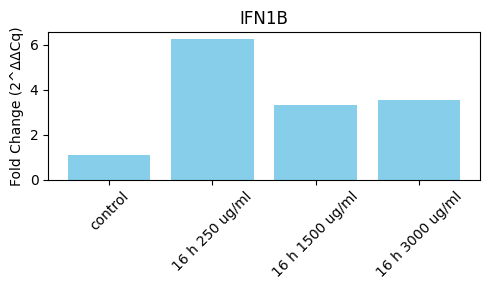

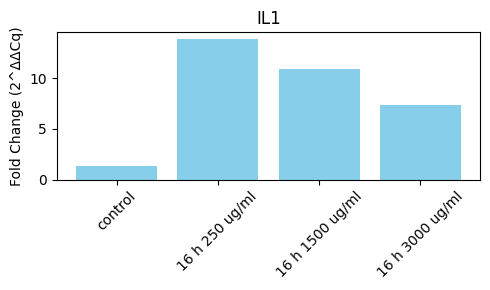

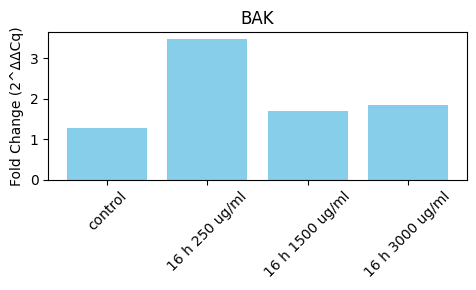

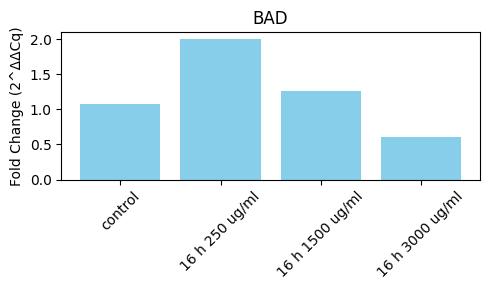

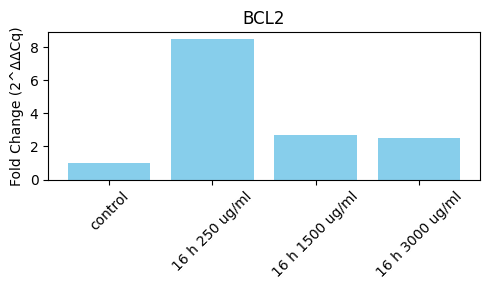

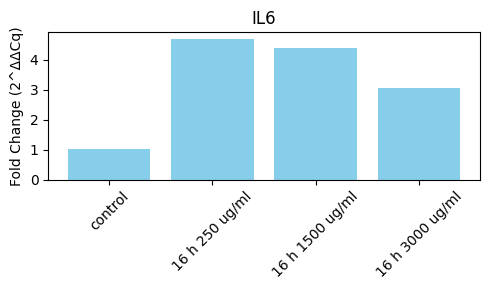

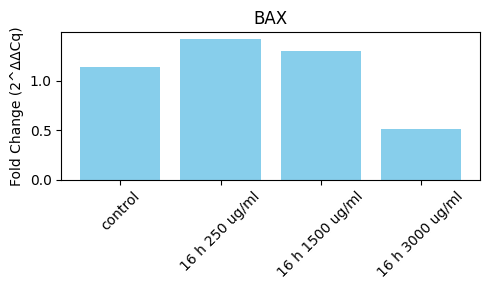

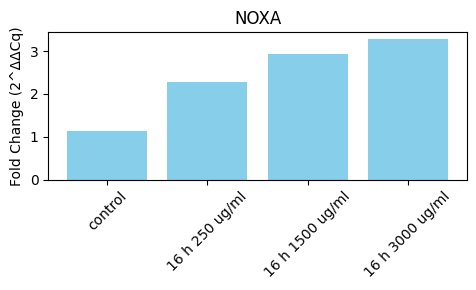

In [22]:
#визуализация
for gene_of_interest in merged['Target'].unique():

    #Фильтруем данные по гену
    df_gene = merged[merged['Target'] == gene_of_interest]

    plt.figure(figsize=(5, 3))
    plt.bar(df_gene['Sample'], df_gene['fold_change'], color='skyblue')
    
    plt.title(f'{gene_of_interest}')
    plt.ylabel('Fold Change (2^ΔΔCq)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    


In [ ]:
Cq_hk_mean - Cq гена домашнего хозяйства
ΔCq - таргет минус ген домашнего хозяйства
ΔCq_normalized - минус среднее контролей